In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [3]:
df=pd.read_csv(r"C:\Users\Sahil\OneDrive\Documents\stock_details_5_years.csv")
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Company
0,2018-11-29 00:00:00-05:00,43.829761,43.863354,42.639594,43.083508,167080000,0.00,0.0,AAPL
1,2018-11-29 00:00:00-05:00,104.769074,105.519257,103.534595,104.636131,28123200,0.00,0.0,MSFT
2,2018-11-29 00:00:00-05:00,54.176498,55.007500,54.099998,54.729000,31004000,0.00,0.0,GOOGL
3,2018-11-29 00:00:00-05:00,83.749496,84.499496,82.616501,83.678497,132264000,0.00,0.0,AMZN
4,2018-11-29 00:00:00-05:00,39.692784,40.064904,38.735195,39.037853,54917200,0.04,0.0,NVDA


# Feature engineering

In [4]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date').reset_index(drop=True)

In [5]:
df['Return'] = df['Close'].pct_change()

In [6]:
df['MA_10'] = df['Close'].rolling(window=10).mean()

In [7]:
df['Vol_MA10'] = df['Volume'].rolling(window=10).mean()

In [8]:
df['Target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)

# EDA

In [9]:
df.shape

(602962, 13)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602962 entries, 0 to 602961
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Date          602962 non-null  object 
 1   Open          602962 non-null  float64
 2   High          602962 non-null  float64
 3   Low           602962 non-null  float64
 4   Close         602962 non-null  float64
 5   Volume        602962 non-null  int64  
 6   Dividends     602962 non-null  float64
 7   Stock Splits  602962 non-null  float64
 8   Company       602962 non-null  object 
 9   Return        602961 non-null  float64
 10  MA_10         602953 non-null  float64
 11  Vol_MA10      602953 non-null  float64
 12  Target        602962 non-null  int64  
dtypes: float64(9), int64(2), object(2)
memory usage: 59.8+ MB


In [11]:
df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Return,MA_10,Vol_MA10,Target
count,602962.000000,602962.000000,602962.000000,602962.000000,6.029620e+05,602962.00000,602962.000000,602961.000000,602953.000000,6.029530e+05,602962.000000
mean,140.074711,141.853492,138.276316,140.095204,5.895601e+06,0.00731,0.000344,2.623223,140.095411,5.895412e+06,0.519572
std,275.401725,279.003191,271.895276,275.477969,1.381596e+07,0.12057,0.050607,15.727749,89.518328,6.653912e+06,0.499617
min,1.052425,1.061195,1.026114,1.034884,0.000000e+00,0.00000,0.000000,-0.998396,20.800385,2.547800e+05,0.000000
25%,39.566159,40.056222,39.058151,39.563746,1.031500e+06,0.00000,0.000000,-0.637116,83.944703,2.497330e+06,0.000000
50%,79.177964,80.125563,78.193820,79.177906,2.228700e+06,0.00000,0.000000,0.067054,115.745002,3.997170e+06,1.000000
75%,157.837190,159.746317,155.841609,157.847153,5.277400e+06,0.00000,0.000000,1.575828,163.508086,6.750060e+06,1.000000
max,6490.259766,6525.000000,6405.000000,6509.350098,1.123003e+09,35.00000,20.000000,656.199075,853.496272,1.366298e+08,1.000000


In [12]:
df.isna().sum()

Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
Company         0
Return          1
MA_10           9
Vol_MA10        9
Target          0
dtype: int64

In [13]:
df['Target'].value_counts()

Target
1    313282
0    289680
Name: count, dtype: int64

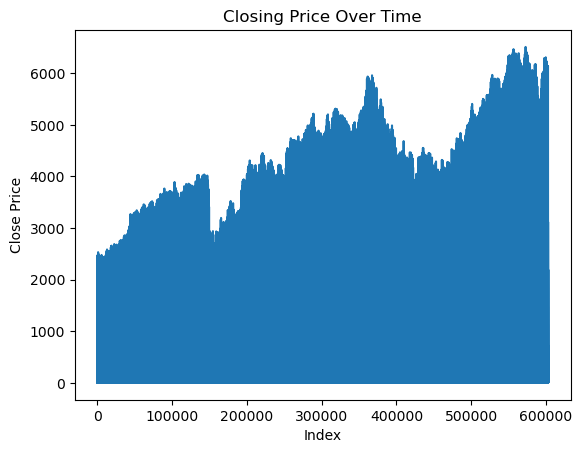

In [14]:
# Closing price trend
import matplotlib.pyplot as plt
plt.figure()
plt.plot(df['Close'])
plt.title('Closing Price Over Time')
plt.xlabel('Index')
plt.ylabel('Close Price')
plt.show()

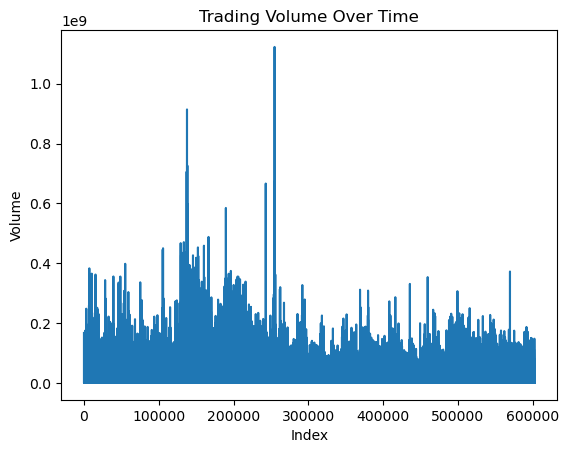

In [15]:
# Volume trend
plt.figure()
plt.plot(df['Volume'])
plt.title('Trading Volume Over Time')
plt.xlabel('Index')
plt.ylabel('Volume')
plt.show()

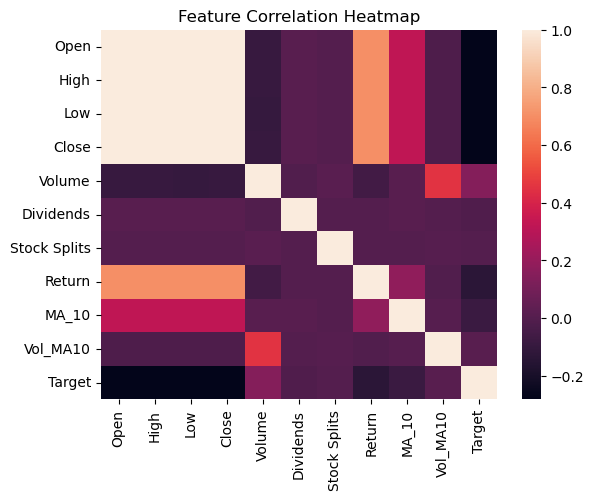

In [16]:
# Correlation heatmap
import seaborn as sns
plt.figure()
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=False)
plt.title('Feature Correlation Heatmap')
plt.show()

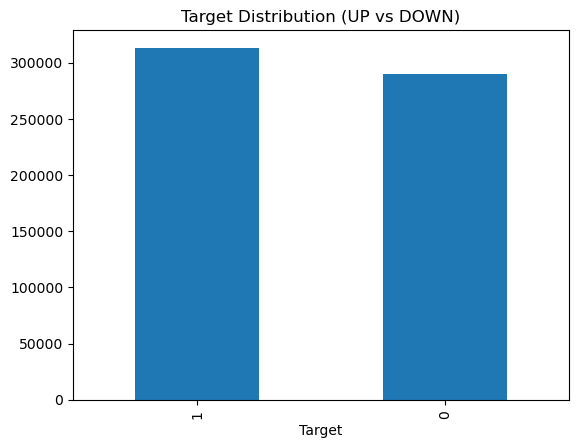

In [17]:
import matplotlib.pyplot as plt

df['Target'].value_counts().plot(kind='bar')
plt.title("Target Distribution (UP vs DOWN)")
plt.show()


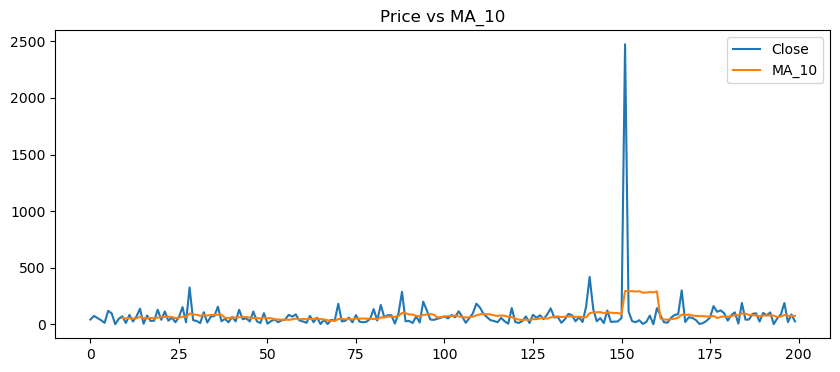

In [18]:
plt.figure(figsize=(10,4))
plt.plot(df['Close'].values[:200], label='Close')
plt.plot(df['MA_10'].values[:200], label='MA_10')
plt.legend()
plt.title("Price vs MA_10")
plt.show()


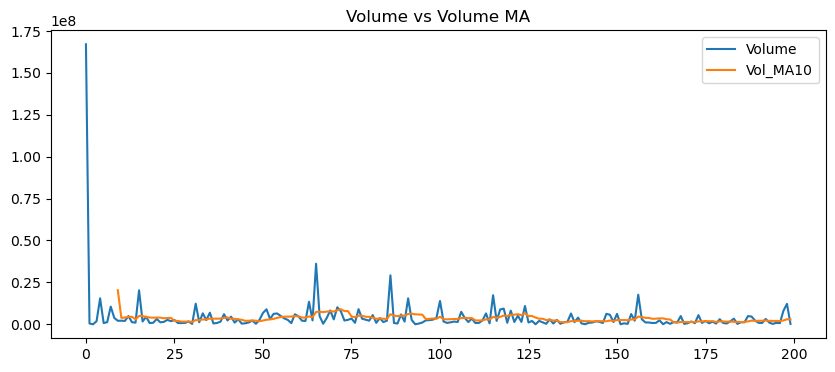

In [19]:
plt.figure(figsize=(10,4))
plt.plot(df['Volume'].values[:200], label='Volume')
plt.plot(df['Vol_MA10'].values[:200], label='Vol_MA10')
plt.legend()
plt.title("Volume vs Volume MA")
plt.show()


# Sequential model

In [20]:
features = ['Open','High','Low','Close','Volume','Return','MA_10','Vol_MA10']
target = 'Target'

df_model = df[features + [target]].dropna()

In [21]:
X = df_model[features]
y = df_model[target]

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [23]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
nn_model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

nn_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)
nn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 833 (3.25 KB)

 Trainable params: 833 (3.25 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
history = nn_model.fit(
    X_train_scaled, y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

Epoch 1/20
12060/12060 ━━━━━━━━━━━━━━━━━━━━ 45s 4ms/step - accuracy: 0.7544 - loss: 0.4963 - val_accuracy: 0.7627 - val_loss: 0.4833
Epoch 2/20
12060/12060 ━━━━━━━━━━━━━━━━━━━━ 85s 4ms/step - accuracy: 0.7640 - loss: 0.4813 - val_accuracy: 0.7658 - val_loss: 0.4778
Epoch 3/20
12060/12060 ━━━━━━━━━━━━━━━━━━━━ 77s 3ms/step - accuracy: 0.7676 - loss: 0.4760 - val_accuracy: 0.7700 - val_loss: 0.4745
Epoch 4/20
12060/12060 ━━━━━━━━━━━━━━━━━━━━ 84s 4ms/step - accuracy: 0.7696 - loss: 0.4721 - val_accuracy: 0.7700 - val_loss: 0.4733
Epoch 5/20
12060/12060 ━━━━━━━━━━━━━━━━━━━━ 80s 3ms/step - accuracy: 0.7704 - loss: 0.4700 - val_accuracy: 0.7698 - val_loss: 0.4695
Epoch 6/20
12060/12060 ━━━━━━━━━━━━━━━━━━━━ 81s 3ms/step - accuracy: 0.7717 - loss: 0.4682 - val_accuracy: 0.7734 - val_loss: 0.4686
Epoch 7/20
12060/12060 ━━━━━━━━━━━━━━━━━━━━ 42s 3ms/step - accuracy: 0.7733 - loss: 0.4665 - val_accuracy: 0.7706 - val_loss: 0.4678
Epoch 8/20
12060/12060 ━━━━━━━━━━━━━━━━━━━━ 81s 3ms/step - accuracy: 

In [26]:
nn_preds = (nn_model.predict(X_test_scaled) > 0.5).astype(int)

print("Neural Network Accuracy:", accuracy_score(y_test, nn_preds))
print(confusion_matrix(y_test, nn_preds))
print(classification_report(y_test, nn_preds))

3769/3769 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
Neural Network Accuracy: 0.7797099286016369
[[43313 14539]
 [12026 50713]]
              precision    recall  f1-score   support

           0       0.78      0.75      0.77     57852
           1       0.78      0.81      0.79     62739

    accuracy                           0.78    120591
   macro avg       0.78      0.78      0.78    120591
weighted avg       0.78      0.78      0.78    120591



# Random forest ml 

In [27]:
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    random_state=42
)

rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=200, random_state=42)

In [28]:
rf_preds = rf_model.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, rf_preds))
print(confusion_matrix(y_test, rf_preds))
print(classification_report(y_test, rf_preds))

Random Forest Accuracy: 0.7864517252531283
[[43813 14039]
 [11713 51026]]
              precision    recall  f1-score   support

           0       0.79      0.76      0.77     57852
           1       0.78      0.81      0.80     62739

    accuracy                           0.79    120591
   macro avg       0.79      0.79      0.79    120591
weighted avg       0.79      0.79      0.79    120591



# Prediction part

In [ ]:
sample_input = np.array([[ 
    250,        # Open
    255,        # High
    248,        # Low
    252,        # Close
    40000000,   # Volume
    0.05,      # Return
    249,        # MA_10
    80000    # Vol_MA10
]])


In [30]:
rf_prediction = rf_model.predict(sample_input)
print("Random Forest Prediction:", "UP 📈" if rf_prediction[0] == 1 else "DOWN 📉")

Random Forest Prediction: DOWN 📉


In [31]:
sample_scaled = scaler.transform(sample_input)
nn_probability = nn_model.predict(sample_scaled)[0][0]

print("Neural Network Prediction:", "UP 📈" if nn_probability > 0.5 else "DOWN 📉")
print("Confidence:", round(nn_probability * 100, 8), "%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Neural Network Prediction: DOWN 📉
Confidence: 15.739173 %


# nre

In [32]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [33]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(
    n_estimators=300,
    max_depth=5,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='binary:logistic',
    eval_metric='logloss',
    random_state=42
)

xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, ...)

In [34]:
xgb_preds = xgb_model.predict(X_test)

print("XGBoost Accuracy:", accuracy_score(y_test, xgb_preds))
print(confusion_matrix(y_test, xgb_preds))
print(classification_report(y_test, xgb_preds))

XGBoost Accuracy: 0.7848181041702946
[[43623 14229]
 [11720 51019]]
              precision    recall  f1-score   support

           0       0.79      0.75      0.77     57852
           1       0.78      0.81      0.80     62739

    accuracy                           0.78    120591
   macro avg       0.79      0.78      0.78    120591
weighted avg       0.78      0.78      0.78    120591



# Model saved

In [38]:
import joblib

joblib.dump(rf_model, "random_forest_model.pkl")
joblib.dump(xgb_model, "xgboost_model.pkl")
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']

In [39]:
rf_loaded = joblib.load("random_forest_model.pkl")
xgb_loaded = joblib.load("xgboost_model.pkl")
scaler_loaded = joblib.load("scaler.pkl")

In [40]:
nn_model.save("price_movement_nn.h5")

In [41]:
from tensorflow.keras.models import load_model

nn_loaded = load_model("price_movement_nn.h5")

In [42]:
def predict_price_movement(input_data):
    input_array = np.array(input_data).reshape(1, -1)
    
    rf_pred = rf_loaded.predict(input_array)[0]
    xgb_pred = xgb_loaded.predict(input_array)[0]
    
    scaled_input = scaler_loaded.transform(input_array)
    nn_prob = nn_loaded.predict(scaled_input)[0][0]

    return {
        "RandomForest": "UP" if rf_pred == 1 else "DOWN",
        "XGBoost": "UP" if xgb_pred == 1 else "DOWN",
        "NeuralNetwork": {
            "Prediction": "UP" if nn_prob > 0.5 else "DOWN",
            "Confidence": round(nn_prob * 100, 2)
        }
    }

In [43]:
import numpy as np
import joblib
from tensorflow.keras.models import load_model

rf_model = joblib.load("random_forest_model.pkl")
xgb_model = joblib.load("xgboost_model.pkl")
scaler = joblib.load("scaler.pkl")
nn_model = load_model("price_movement_nn.h5")

In [44]:
def ensemble_predict(input_data):
    input_array = np.array(input_data).reshape(1, -1)

    # Random Forest probability
    rf_prob = rf_model.predict_proba(input_array)[0][1]

    # XGBoost probability
    xgb_prob = xgb_model.predict_proba(input_array)[0][1]

    # Neural Network probability
    scaled_input = scaler.transform(input_array)
    nn_prob = nn_model.predict(scaled_input)[0][0]

    # Soft voting (average probability)
    avg_prob = (rf_prob + xgb_prob + nn_prob) / 3

    final_prediction = "UP 📈" if avg_prob > 0.5 else "DOWN 📉"

    return {
        "RandomForest_Prob": round(rf_prob, 3),
        "XGBoost_Prob": round(xgb_prob, 3),
        "NeuralNet_Prob": round(nn_prob, 3),
        "Ensemble_Prob": round(avg_prob, 3),
        "Final_Prediction": final_prediction
    }

In [56]:
sample_input = [
   250,        # Open
    258,        # High
    247,        # Low
    255,        # Close
    7500000,  # Volume
    0.78,      # Return (1.8%)
    248,        # MA_10
    720000   # Vol_MA10
]

result = ensemble_predict(sample_input)
result

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


{'RandomForest_Prob': np.float64(0.243),
 'XGBoost_Prob': np.float32(0.243),
 'NeuralNet_Prob': np.float32(0.312),
 'Ensemble_Prob': np.float64(0.266),
 'Final_Prediction': 'DOWN 📉'}